<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/4_pnl/clase_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Ejemplo de datos categóricos
data = {'Categoria': ['Rojo', 'Azul', 'Verde', 'Rojo', 'Azul']}
df = pd.DataFrame(data)

print("DataFrame original:")
print(df)
print("-" * 30)

# Usando pandas get_dummies
df_dummies = pd.get_dummies(df, columns=['Categoria'])
print("Usando pandas get_dummies:")
print(df_dummies)
print("-" * 30)

# Usando Scikit-learn OneHotEncoder
# Necesita un array numpy 2D
data_np = df[['Categoria']].values
encoder_sk = OneHotEncoder(sparse_output=False)
data_encoded_sk = encoder_sk.fit_transform(data_np)
print("Usando Scikit-learn OneHotEncoder:")
print(data_encoded_sk)
print("-" * 30)

# Usando Keras to_categorical
# Necesita etiquetas numéricas. Primero convertimos las categorías a números.
# Usamos factorize para esto
codes, uniques = pd.factorize(df['Categoria'])
data_encoded_keras = to_categorical(codes)
print("Usando Keras to_categorical:")
print(data_encoded_keras)
print("-" * 30)

print("Diferencias clave:")
print("- `pd.get_dummies`: Funciona directamente con DataFrames, crea nuevas columnas con los nombres de las categorías.")
print("- `sklearn.preprocessing.OneHotEncoder`: Trabaja con arrays NumPy (requiere reshape si es necesario), devuelve un array NumPy. Requiere `fit` y `transform`.")
print("- `tf.keras.utils.to_categorical`: Trabaja con etiquetas numéricas (enteros), devuelve un array NumPy. Útil para la salida de modelos de clasificación en Keras.")

DataFrame original:
  Categoria
0      Rojo
1      Azul
2     Verde
3      Rojo
4      Azul
------------------------------
Usando pandas get_dummies:
   Categoria_Azul  Categoria_Rojo  Categoria_Verde
0           False            True            False
1            True           False            False
2           False           False             True
3           False            True            False
4            True           False            False
------------------------------
Usando Scikit-learn OneHotEncoder:
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
------------------------------
Usando Keras to_categorical:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
------------------------------
Diferencias clave:
- `pd.get_dummies`: Funciona directamente con DataFrames, crea nuevas columnas con los nombres de las categorías.
- `sklearn.preprocessing.OneHotEncoder`: Trabaja con arrays NumPy (requiere reshape si es necesario), devuelve un array NumPy. Requi

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import numpy as np

# Ejemplo de texto
sentences = [
    'El perro corre en el parque',
    'El gato duerme en la casa',
    'El perro juega con la pelota',
    'El gato caza un ratón'
]

# Tokenización
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

print("Índice de palabras:")
print(word_index)
print("-" * 30)

print("Secuencias de texto:")
print(sequences)
print("-" * 30)

# Padding (para que todas las secuencias tengan la misma longitud)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

print("Secuencias con padding:")
print(padded_sequences)
print("-" * 30)

# Crear un modelo simple con una capa de Embedding
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=8, input_length=max_length),
    Flatten(),
    Dense(1, activation='sigmoid') # Capa de ejemplo, puede ser cualquier otra
])

# Build the model to initialize weights
model.build(input_shape=(None, max_length))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Para ver los embeddings, puedes acceder a los pesos de la capa de Embedding
# Ten en cuenta que estos embeddings son aleatorios al principio y se aprenderían durante el entrenamiento
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

print("Forma de la matriz de embeddings (vocabulario_size, embedding_dim):")
print(embeddings.shape)
print("-" * 30)

# Puedes ver el vector de embedding para una palabra específica (ej. 'perro')
word = 'perro'
if word in word_index:
    index = word_index[word]
    word_embedding = embeddings[index]
    print(f"Vector de embedding para '{word}':")
    print(word_embedding)
else:
    print(f"La palabra '{word}' no está en el vocabulario.")

print("-" * 30)

print("Explicación:")
print("- **Tokenización:** Convierte el texto en secuencias de números (IDs de palabras).")
print("- **Padding:** Asegura que todas las secuencias tengan la misma longitud rellenando con ceros.")
print("- **Capa de Embedding:** Representa cada palabra con un vector de números de menor dimensión.")
print("- **output_dim:** Es la dimensión del vector de embedding para cada palabra.")
print("- **input_dim:** Es el tamaño del vocabulario + 1 (para el padding).")
print("- **input_length:** Es la longitud máxima de las secuencias.")
print("Estos embeddings son inicialmente aleatorios y se ajustarían durante el entrenamiento de un modelo en una tarea específica (como clasificación de texto).")

Índice de palabras:
{'<OOV>': 1, 'el': 2, 'perro': 3, 'en': 4, 'gato': 5, 'la': 6, 'corre': 7, 'parque': 8, 'duerme': 9, 'casa': 10, 'juega': 11, 'con': 12, 'pelota': 13, 'caza': 14, 'un': 15, 'ratón': 16}
------------------------------
Secuencias de texto:
[[2, 3, 7, 4, 2, 8], [2, 5, 9, 4, 6, 10], [2, 3, 11, 12, 6, 13], [2, 5, 14, 15, 16]]
------------------------------
Secuencias con padding:
[[ 2  3  7  4  2  8]
 [ 2  5  9  4  6 10]
 [ 2  3 11 12  6 13]
 [ 2  5 14 15 16  0]]
------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 6, 8)           │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

Forma de la matriz de embeddings (vocabulario_size, embedding_dim):
(17, 8)
------------------------------
Vector de embedding para 'perro':
[-0.00524797 -0.0449581   0.03110847 -0.02950633  0.00090873  0.00061829
 -0.0278508   0.01563616]
------------------------------
Explicación:
- **Tokenización:** Convierte el texto en secuencias de números (IDs de palabras).
- **Padding:** Asegura que todas las secuencias tengan la misma longitud rellenando con ceros.
- **Capa de Embedding:** Representa cada palabra con un vector de números de menor dimensión.
- **output_dim:** Es la dimensión del vector de embedding para cada palabra.
- **input_dim:** Es el tamaño del vocabulario + 1 (para el padding).
- **input_length:** Es la longitud máxima de las secuencias.
Estos embeddings son inicialmente aleatorios y se ajustarían durante el entrenamiento de un modelo en una tarea específica (como clasificación de texto).


In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

sentences = [
    'El perro corre en el parque',
    'El gato duerme en la casa',
    'El perro juega con la pelota',
    'El gato caza un ratón'
]

# Tokenización para One-Hot Encoding a nivel de palabra
words = [word for sentence in sentences for word in sentence.lower().split()]
unique_words = sorted(list(set(words)))
vocab_size = len(unique_words)

print("Vocabulario para One-Hot Encoding:")
print(unique_words)
print("-" * 30)

# Crear representaciones One-Hot para cada oración
one_hot_encoded_sentences = []
for sentence in sentences:
    sentence_words = sentence.lower().split()
    one_hot_vector = np.zeros(vocab_size)
    for word in sentence_words:
        if word in unique_words:
            index = unique_words.index(word)
            one_hot_vector[index] = 1  # O podrías contar la frecuencia: one_hot_vector[index] += 1
    one_hot_encoded_sentences.append(one_hot_vector)

print("Representación One-Hot de las oraciones:")
for i, sentence in enumerate(sentences):
    print(f"Oración {i+1}: {sentence}")
    print(one_hot_encoded_sentences[i])
    print("-" * 10)

print("\nComparación con Word Embeddings (basado en la celda anterior):")
print("- **One-Hot Encoding:** Crea un vector binario largo donde cada dimensión representa una palabra única del vocabulario. La dimensión del vector es igual al tamaño del vocabulario. No captura relaciones semánticas entre palabras.")
print("- **Word Embeddings:** Representa cada palabra como un vector denso de menor dimensión. La dimensión del vector es un parámetro (output_dim en Keras). Captura relaciones semánticas (palabras similares tienen vectores similares).")

Vocabulario para One-Hot Encoding:
['casa', 'caza', 'con', 'corre', 'duerme', 'el', 'en', 'gato', 'juega', 'la', 'parque', 'pelota', 'perro', 'ratón', 'un']
------------------------------
Representación One-Hot de las oraciones:
Oración 1: El perro corre en el parque
[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
----------
Oración 2: El gato duerme en la casa
[1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
----------
Oración 3: El perro juega con la pelota
[0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
----------
Oración 4: El gato caza un ratón
[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
----------

Comparación con Word Embeddings (basado en la celda anterior):
- **One-Hot Encoding:** Crea un vector binario largo donde cada dimensión representa una palabra única del vocabulario. La dimensión del vector es igual al tamaño del vocabulario. No captura relaciones semánticas entre palabras.
- **Word Embeddings:** Representa cada palabra como un vector denso de menor dimensión. La dimens

In [5]:
# Acceder al word_index y a los embeddings de la celda WMu9ZuXMU5tR
# Es importante que la celda WMu9ZuXMU5tR se haya ejecutado antes para que estas variables existan.

words_to_show = ['pelota', 'parque', 'perro', 'gato']

print("Vectores de embedding para palabras específicas:")
print("-" * 40)

for word in words_to_show:
    if word in word_index:
        index = word_index[word]
        word_embedding = embeddings[index]
        print(f"Vector de embedding para '{word}':")
        print(word_embedding)
        print("-" * 20)
    else:
        print(f"La palabra '{word}' no está en el vocabulario.")
        print("-" * 20)

Vectores de embedding para palabras específicas:
----------------------------------------
Vector de embedding para 'pelota':
[ 0.02356908 -0.02547683  0.03363779  0.02462841  0.02558625 -0.03036195
  0.03894265  0.04249628]
--------------------
Vector de embedding para 'parque':
[ 0.01349691 -0.00854899 -0.03189993 -0.00283885  0.04491376  0.00339184
  0.03399635  0.03922579]
--------------------
Vector de embedding para 'perro':
[-0.00524797 -0.0449581   0.03110847 -0.02950633  0.00090873  0.00061829
 -0.0278508   0.01563616]
--------------------
Vector de embedding para 'gato':
[ 0.03620568 -0.02313721  0.00301746 -0.01685438 -0.03915597  0.03584406
 -0.00405413  0.02971119]
--------------------


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

words_to_compare = ['pelota', 'parque', 'perro', 'gato']
word_vectors = {}

# Obtener los vectores de embedding para las palabras de interés
for word in words_to_compare:
    if word in word_index:
        index = word_index[word]
        word_vectors[word] = embeddings[index].reshape(1, -1) # Reshape para que sea 2D
    else:
        print(f"Advertencia: La palabra '{word}' no está en el vocabulario.")

print("Medidas de similitud del coseno entre conceptos:")
print("-" * 50)

# Calcular y mostrar la similitud del coseno entre pares de palabras
for i in range(len(words_to_compare)):
    for j in range(i + 1, len(words_to_compare)):
        word1 = words_to_compare[i]
        word2 = words_to_compare[j]

        if word1 in word_vectors and word2 in word_vectors:
            vector1 = word_vectors[word1]
            vector2 = word_vectors[word2]
            similarity = cosine_similarity(vector1, vector2)[0][0]
            print(f"Similitud '{word1}' y '{word2}': {similarity:.4f}")
        else:
            print(f"No se pudo calcular la similitud entre '{word1}' y '{word2}' (una o ambas palabras no encontradas).")

print("-" * 50)

print("Nota: Estos valores de similitud se basan en los embeddings aleatorios iniciales. Después del entrenamiento, los valores reflejarían mejor las relaciones semánticas aprendidas.")

Medidas de similitud del coseno entre conceptos:
--------------------------------------------------
Similitud 'pelota' y 'parque': 0.4999
Similitud 'pelota' y 'perro': 0.1492
Similitud 'pelota' y 'gato': 0.0212
Similitud 'parque' y 'perro': -0.1631
Similitud 'parque' y 'gato': 0.0048
Similitud 'perro' y 'gato': 0.3740
--------------------------------------------------
Nota: Estos valores de similitud se basan en los embeddings aleatorios iniciales. Después del entrenamiento, los valores reflejarían mejor las relaciones semánticas aprendidas.


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import numpy as np

# Ejemplo de texto con más oraciones
sentences = [
    'El perro corre en el parque',
    'El gato duerme en la casa',
    'El perro juega con la pelota',
    'El gato caza un ratón',
    'El perro y el gato son animales domésticos',
    'Los perros y gatos son seres vivos',
    'La humanidad ha tenido una relación cercana con perros y gatos',
    'Los perros y los gatos a menudo interactúan entre ellos'
]

# Tokenización
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)

print("Índice de palabras (con más oraciones):")
print(word_index)
print("-" * 30)

print("Secuencias de texto (con más oraciones):")
print(sequences)
print("-" * 30)

# Padding (para que todas las secuencias tengan la misma longitud)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

print("Secuencias con padding (con más oraciones):")
print(padded_sequences)
print("-" * 30)

# Crear un modelo simple con una capa de Embedding
# Usamos el nuevo tamaño de vocabulario y longitud máxima
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=8, input_length=max_length),
    Flatten(),
    Dense(1, activation='sigmoid') # Capa de ejemplo, puede ser cualquier otra
])

# Build the model to initialize weights
model.build(input_shape=(None, max_length))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Para ver los embeddings, puedes acceder a los pesos de la capa de Embedding
# Ten en cuenta que estos embeddings son aleatorios al principio y se aprenderían durante el entrenamiento
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

print("Forma de la matriz de embeddings (vocabulario_size, embedding_dim):")
print(embeddings.shape)
print("-" * 30)

# Puedes ver el vector de embedding para una palabra específica (ej. 'perro')
word = 'perro'
if word in word_index:
    index = word_index[word]
    word_embedding = embeddings[index]
    print(f"Vector de embedding para '{word}':")
    print(word_embedding)
else:
    print(f"La palabra '{word}' no está en el vocabulario.")

print("-" * 30)

print("Explicación:")
print("Hemos añadido más oraciones para capturar mejor las relaciones entre las palabras. El proceso de tokenización, padding y creación de la capa de embedding se repite con el nuevo conjunto de datos.")
print("Los embeddings mostrados siguen siendo aleatorios hasta que el modelo sea entrenado.")

Índice de palabras (con más oraciones):
{'<OOV>': 1, 'el': 2, 'y': 3, 'perro': 4, 'gato': 5, 'la': 6, 'los': 7, 'perros': 8, 'gatos': 9, 'en': 10, 'con': 11, 'son': 12, 'corre': 13, 'parque': 14, 'duerme': 15, 'casa': 16, 'juega': 17, 'pelota': 18, 'caza': 19, 'un': 20, 'ratón': 21, 'animales': 22, 'domésticos': 23, 'seres': 24, 'vivos': 25, 'humanidad': 26, 'ha': 27, 'tenido': 28, 'una': 29, 'relación': 30, 'cercana': 31, 'a': 32, 'menudo': 33, 'interactúan': 34, 'entre': 35, 'ellos': 36}
------------------------------
Secuencias de texto (con más oraciones):
[[2, 4, 13, 10, 2, 14], [2, 5, 15, 10, 6, 16], [2, 4, 17, 11, 6, 18], [2, 5, 19, 20, 21], [2, 4, 3, 2, 5, 12, 22, 23], [7, 8, 3, 9, 12, 24, 25], [6, 26, 27, 28, 29, 30, 31, 11, 8, 3, 9], [7, 8, 3, 7, 9, 32, 33, 34, 35, 36]]
------------------------------
Secuencias con padding (con más oraciones):
[[ 2  4 13 10  2 14  0  0  0  0  0]
 [ 2  5 15 10  6 16  0  0  0  0  0]
 [ 2  4 17 11  6 18  0  0  0  0  0]
 [ 2  5 19 20 21  0  0  0 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 11, 8)          │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 88)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            89 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

Forma de la matriz de embeddings (vocabulario_size, embedding_dim):
(37, 8)
------------------------------
Vector de embedding para 'perro':
[ 0.04892186 -0.03289267 -0.03727658 -0.02003684  0.01347039 -0.00479908
  0.01018343 -0.03253269]
------------------------------
Explicación:
Hemos añadido más oraciones para capturar mejor las relaciones entre las palabras. El proceso de tokenización, padding y creación de la capa de embedding se repite con el nuevo conjunto de datos.
Los embeddings mostrados siguen siendo aleatorios hasta que el modelo sea entrenado.


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

words_to_compare = ['pelota', 'parque', 'perro', 'gato']
word_vectors = {}

# Obtener los vectores de embedding para las palabras de interés
for word in words_to_compare:
    if word in word_index:
        index = word_index[word]
        word_vectors[word] = embeddings[index].reshape(1, -1) # Reshape para que sea 2D
    else:
        print(f"Advertencia: La palabra '{word}' no está en el vocabulario.")

print("Medidas de similitud del coseno entre conceptos (con más oraciones):")
print("-" * 50)

# Calcular y mostrar la similitud del coseno entre pares de palabras
for i in range(len(words_to_compare)):
    for j in range(i + 1, len(words_to_compare)):
        word1 = words_to_compare[i]
        word2 = words_to_compare[j]

        if word1 in word_vectors and word2 in word_vectors:
            vector1 = word_vectors[word1]
            vector2 = word_vectors[word2]
            similarity = cosine_similarity(vector1, vector2)[0][0]
            print(f"Similitud '{word1}' y '{word2}': {similarity:.4f}")
        else:
            print(f"No se pudo calcular la similitud entre '{word1}' y '{word2}' (una o ambas palabras no encontradas).")

print("-" * 50)

print("Nota: Estos valores de similitud siguen basándose en los embeddings aleatorios iniciales, pero reflejan el nuevo vocabulario. El entrenamiento del modelo es crucial para que los embeddings capturen relaciones semánticas significativas basadas en el contexto de las oraciones.")

Medidas de similitud del coseno entre conceptos (con más oraciones):
--------------------------------------------------
Similitud 'pelota' y 'parque': -0.5712
Similitud 'pelota' y 'perro': 0.2220
Similitud 'pelota' y 'gato': -0.1897
Similitud 'parque' y 'perro': 0.1024
Similitud 'parque' y 'gato': -0.4393
Similitud 'perro' y 'gato': -0.4271
--------------------------------------------------
Nota: Estos valores de similitud siguen basándose en los embeddings aleatorios iniciales, pero reflejan el nuevo vocabulario. El entrenamiento del modelo es crucial para que los embeddings capturen relaciones semánticas significativas basadas en el contexto de las oraciones.


In [9]:
%%capture
!pip install google-api-python-client langdetect pandas python-dotenv

In [11]:
"""
Script para descargar comentarios de YouTube y analizar países/idiomas
Adaptado para Google Colab con archivo .env

INSTALACIÓN EN COLAB (ejecutar primero):
!pip install google-api-python-client langdetect pandas python-dotenv
"""

import os
from dotenv import load_dotenv
from googleapiclient.discovery import build
from langdetect import detect, detect_langs
import pandas as pd
from collections import Counter
import re

# ========== CARGAR VARIABLES DE ENTORNO ==========
load_dotenv()  # Carga el archivo .env
API_KEY = os.getenv('YOUTUBE_API_KEY')
VIDEO_ID = os.getenv('VIDEO_ID', 'UEqTIwRrWvA')  # Valor por defecto

if not API_KEY:
    raise ValueError("❌ No se encontró YOUTUBE_API_KEY en el archivo .env")

print(f"✅ API Key cargada correctamente")
print(f"📹 Video ID: {VIDEO_ID}")

# ========== FUNCIÓN PARA DESCARGAR COMENTARIOS ==========
def get_video_comments(video_id, api_key, max_results=100):
    """Descarga comentarios de un video de YouTube"""
    youtube = build('youtube', 'v3', developerKey=api_key)
    comments = []

    try:
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=100,
            textFormat='plainText'
        )

        while request and len(comments) < max_results:
            response = request.execute()

            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']
                comments.append({
                    'autor': comment['authorDisplayName'],
                    'texto': comment['textDisplay'],
                    'likes': comment['likeCount'],
                    'fecha': comment['publishedAt']
                })

            # Siguiente página
            request = youtube.commentThreads().list_next(request, response)

    except Exception as e:
        print(f"❌ Error al descargar comentarios: {e}")
        return []

    return comments

# ========== DETECTAR IDIOMA ==========
def detect_language(text):
    """Detecta el idioma de un texto"""
    try:
        return detect(text)
    except:
        return 'desconocido'

# ========== BUSCAR MENCIONES DE PAÍSES ==========
def find_country_mentions(text):
    """Busca menciones de países en el texto"""
    paises = {
        'argentina': ['argentina', 'arg', 'buenos aires', '🇦🇷'],
        'mexico': ['mexico', 'méxico', 'mex', '🇲🇽'],
        'españa': ['españa', 'spain', 'esp', '🇪🇸'],
        'colombia': ['colombia', 'col', '🇨🇴'],
        'chile': ['chile', 'chi', '🇨🇱'],
        'peru': ['peru', 'perú', '🇵🇪'],
        'venezuela': ['venezuela', 've', '🇻🇪'],
        'ecuador': ['ecuador', 'ecu', '🇪🇨'],
        'uruguay': ['uruguay', 'uru', '🇺🇾'],
        'bolivia': ['bolivia', 'bol', '🇧🇴'],
        'paraguay': ['paraguay', 'par', '🇵🇾'],
        'usa': ['usa', 'united states', 'estados unidos', 'eeuu', '🇺🇸'],
        'brasil': ['brasil', 'brazil', 'bra', '🇧🇷'],
        'costa rica': ['costa rica', '🇨🇷'],
        'panama': ['panama', 'panamá', '🇵🇦'],
        'guatemala': ['guatemala', '🇬🇹'],
        'cuba': ['cuba', '🇨🇺'],
        'republica dominicana': ['dominicana', 'republica dominicana', '🇩🇴'],
        'puerto rico': ['puerto rico', '🇵🇷'],
        'el salvador': ['el salvador', '🇸🇻'],
        'honduras': ['honduras', '🇭🇳'],
        'nicaragua': ['nicaragua', '🇳🇮'],
    }

    text_lower = text.lower()
    paises_encontrados = []

    for pais, keywords in paises.items():
        for keyword in keywords:
            if keyword in text_lower:
                paises_encontrados.append(pais)
                break

    return paises_encontrados

# ========== ANÁLISIS PRINCIPAL ==========
def analyze_comments(comments):
    """Analiza idiomas y países mencionados en los comentarios"""

    idiomas = []
    paises_mencionados = []

    print(f"\n🔄 Analizando {len(comments)} comentarios...")

    for i, comment in enumerate(comments, 1):
        if i % 50 == 0:
            print(f"  Procesados: {i}/{len(comments)}")

        texto = comment['texto']

        # Detectar idioma
        idioma = detect_language(texto)
        idiomas.append(idioma)
        comment['idioma'] = idioma

        # Buscar países mencionados
        paises = find_country_mentions(texto)
        paises_mencionados.extend(paises)
        comment['paises_mencionados'] = ', '.join(paises) if paises else ''

    # Contar idiomas y países
    contador_idiomas = Counter(idiomas)
    contador_paises = Counter(paises_mencionados)

    return contador_idiomas, contador_paises, comments

# ========== VISUALIZAR RESULTADOS ==========
def mostrar_resultados(idiomas, paises, comentarios):
    """Muestra los resultados del análisis"""

    print("\n" + "="*60)
    print("📊 RESULTADOS DEL ANÁLISIS")
    print("="*60)

    print(f"\n🔢 Total de comentarios analizados: {len(comentarios)}")

    print("\n🌐 IDIOMAS DETECTADOS:")
    print("-" * 40)
    for idioma, cantidad in idiomas.most_common(15):
        porcentaje = (cantidad / len(comentarios)) * 100
        barra = "█" * int(porcentaje / 2)
        print(f"  {idioma:12} │ {cantidad:4} │ {porcentaje:5.1f}% │ {barra}")

    if paises:
        print("\n🌍 PAÍSES MENCIONADOS:")
        print("-" * 40)
        for pais, cantidad in paises.most_common(15):
            barra = "█" * (cantidad if cantidad < 20 else 20)
            print(f"  {pais:20} │ {cantidad:3} menciones │ {barra}")
    else:
        print("\n🌍 No se encontraron menciones de países en los comentarios")

    print("\n" + "="*60)

# ========== EJECUTAR ANÁLISIS ==========
def main():
    """Función principal"""

    print("\n🚀 INICIANDO ANÁLISIS DE COMENTARIOS DE YOUTUBE")
    print("="*60)

    # Descargar comentarios
    print(f"\n📥 Descargando comentarios del video: {VIDEO_ID}")
    comentarios = get_video_comments(VIDEO_ID, API_KEY, max_results=1000)

    if not comentarios:
        print("❌ No se pudieron descargar comentarios. Verifica tu API key y el ID del video.")
        return

    print(f"✅ {len(comentarios)} comentarios descargados exitosamente")

    # Analizar comentarios
    idiomas, paises, comentarios_analizados = analyze_comments(comentarios)

    # Mostrar resultados
    mostrar_resultados(idiomas, paises, comentarios_analizados)

    # Guardar en CSV
    df = pd.DataFrame(comentarios_analizados)
    df.to_csv('comentarios_youtube_analisis.csv', index=False, encoding='utf-8')
    print(f"\n💾 Datos guardados en: comentarios_youtube_analisis.csv")

    # Estadísticas adicionales
    comentarios_con_paises = sum(1 for c in comentarios_analizados if c['paises_mencionados'])

    print(f"\n📈 ESTADÍSTICAS ADICIONALES:")
    print(f"  • Comentarios con países mencionados: {comentarios_con_paises} ({comentarios_con_paises/len(comentarios)*100:.1f}%)")
    print(f"  • Idiomas únicos detectados: {len(idiomas)}")
    print(f"  • Países únicos mencionados: {len(paises)}")

    return df

# Ejecutar
if __name__ == "__main__":
    df = main()


# ========== INSTRUCCIONES PARA GOOGLE COLAB ==========
"""
📝 CÓMO USAR EN GOOGLE COLAB:

1️⃣ INSTALAR DEPENDENCIAS (Primera celda):
   !pip install google-api-python-client langdetect pandas python-dotenv

2️⃣ CREAR ARCHIVO .env (Segunda celda):
   %%writefile .env
   YOUTUBE_API_KEY=tu_api_key_aqui
   VIDEO_ID=UEqTIwRrWvA

3️⃣ COPIAR Y EJECUTAR ESTE SCRIPT (Tercera celda)

4️⃣ DESCARGAR RESULTADOS:
   from google.colab import files
   files.download('comentarios_youtube_analisis.csv')

🔑 OBTENER TU API KEY:
1. Ve a: https://console.cloud.google.com/
2. Crea un nuevo proyecto
3. Habilita "YouTube Data API v3"
4. Credenciales → Crear credenciales → Clave de API
5. Copia tu API key

⚠️ LÍMITES GRATUITOS:
- 10,000 unidades/día
- Leer comentarios: ~1 unidad por cada 100 comentarios
"""

✅ API Key cargada correctamente
📹 Video ID: UEqTIwRrWvA

🚀 INICIANDO ANÁLISIS DE COMENTARIOS DE YOUTUBE

📥 Descargando comentarios del video: UEqTIwRrWvA
✅ 1000 comentarios descargados exitosamente

🔄 Analizando 1000 comentarios...
  Procesados: 50/1000
  Procesados: 100/1000
  Procesados: 150/1000
  Procesados: 200/1000
  Procesados: 250/1000
  Procesados: 300/1000
  Procesados: 350/1000
  Procesados: 400/1000
  Procesados: 450/1000
  Procesados: 500/1000
  Procesados: 550/1000
  Procesados: 600/1000
  Procesados: 650/1000
  Procesados: 700/1000
  Procesados: 750/1000
  Procesados: 800/1000
  Procesados: 850/1000
  Procesados: 900/1000
  Procesados: 950/1000
  Procesados: 1000/1000

📊 RESULTADOS DEL ANÁLISIS

🔢 Total de comentarios analizados: 1000

🌐 IDIOMAS DETECTADOS:
----------------------------------------
  es           │  666 │  66.6% │ █████████████████████████████████
  desconocido  │   96 │   9.6% │ ████
  pt           │   57 │   5.7% │ ██
  it           │   34 │   3.4% │ █


'\n📝 CÓMO USAR EN GOOGLE COLAB:\n\n1️⃣ INSTALAR DEPENDENCIAS (Primera celda):\n   !pip install google-api-python-client langdetect pandas python-dotenv\n\n2️⃣ CREAR ARCHIVO .env (Segunda celda):\n   %%writefile .env\n   YOUTUBE_API_KEY=tu_api_key_aqui\n   VIDEO_ID=UEqTIwRrWvA\n\n3️⃣ COPIAR Y EJECUTAR ESTE SCRIPT (Tercera celda)\n\n4️⃣ DESCARGAR RESULTADOS:\n   from google.colab import files\n   files.download(\'comentarios_youtube_analisis.csv\')\n\n🔑 OBTENER TU API KEY:\n1. Ve a: https://console.cloud.google.com/\n2. Crea un nuevo proyecto\n3. Habilita "YouTube Data API v3"\n4. Credenciales → Crear credenciales → Clave de API\n5. Copia tu API key\n\n⚠️ LÍMITES GRATUITOS:\n- 10,000 unidades/día\n- Leer comentarios: ~1 unidad por cada 100 comentarios\n'

In [12]:
"""
Script para descargar comentarios de YouTube y analizar países/idiomas
Adaptado para Google Colab con archivo .env

INSTALACIÓN EN COLAB (ejecutar primero):
!pip install google-api-python-client langdetect pandas python-dotenv
"""

import os
from dotenv import load_dotenv
from googleapiclient.discovery import build
from langdetect import detect, detect_langs
import pandas as pd
from collections import Counter
import re

# ========== CARGAR VARIABLES DE ENTORNO ==========
load_dotenv()  # Carga el archivo .env
API_KEY = os.getenv('YOUTUBE_API_KEY')
VIDEO_ID = os.getenv('VIDEO_ID', 'UEqTIwRrWvA')  # Valor por defecto

if not API_KEY:
    raise ValueError("❌ No se encontró YOUTUBE_API_KEY en el archivo .env")

print(f"✅ API Key cargada correctamente")
print(f"📹 Video ID: {VIDEO_ID}")

# ========== FUNCIÓN PARA DESCARGAR COMENTARIOS ==========
def get_video_comments(video_id, api_key, max_results=100):
    """Descarga comentarios de un video de YouTube"""
    youtube = build('youtube', 'v3', developerKey=api_key)
    comments = []

    try:
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=100,
            textFormat='plainText'
        )

        while request and len(comments) < max_results:
            response = request.execute()

            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']
                comments.append({
                    'autor': comment['authorDisplayName'],
                    'texto': comment['textDisplay'],
                    'likes': comment['likeCount'],
                    'fecha': comment['publishedAt']
                })

            # Siguiente página
            request = youtube.commentThreads().list_next(request, response)

    except Exception as e:
        print(f"❌ Error al descargar comentarios: {e}")
        return []

    return comments

# ========== DETECTAR IDIOMA ==========
def detect_language(text):
    """Detecta el idioma de un texto"""
    try:
        return detect(text)
    except:
        return 'desconocido'

# ========== BUSCAR MENCIONES DE PAÍSES ==========
def find_country_mentions(text):
    """Busca menciones de países en el texto"""
    paises = {
        'argentina': ['argentina', 'arg', 'buenos aires', '🇦🇷'],
        'mexico': ['mexico', 'méxico', 'mex', '🇲🇽'],
        'españa': ['españa', 'spain', 'esp', '🇪🇸'],
        'colombia': ['colombia', 'col', '🇨🇴'],
        'chile': ['chile', 'chi', '🇨🇱'],
        'peru': ['peru', 'perú', '🇵🇪'],
        'venezuela': ['venezuela', 've', '🇻🇪'],
        'ecuador': ['ecuador', 'ecu', '🇪🇨'],
        'uruguay': ['uruguay', 'uru', '🇺🇾'],
        'bolivia': ['bolivia', 'bol', '🇧🇴'],
        'paraguay': ['paraguay', 'par', '🇵🇾'],
        'usa': ['usa', 'united states', 'estados unidos', 'eeuu', '🇺🇸'],
        'brasil': ['brasil', 'brazil', 'bra', '🇧🇷'],
        'costa rica': ['costa rica', '🇨🇷'],
        'panama': ['panama', 'panamá', '🇵🇦'],
        'guatemala': ['guatemala', '🇬🇹'],
        'cuba': ['cuba', '🇨🇺'],
        'republica dominicana': ['dominicana', 'republica dominicana', '🇩🇴'],
        'puerto rico': ['puerto rico', '🇵🇷'],
        'el salvador': ['el salvador', '🇸🇻'],
        'honduras': ['honduras', '🇭🇳'],
        'nicaragua': ['nicaragua', '🇳🇮'],
    }

    text_lower = text.lower()
    paises_encontrados = []

    for pais, keywords in paises.items():
        for keyword in keywords:
            if keyword in text_lower:
                paises_encontrados.append(pais)
                break

    return paises_encontrados

# ========== ANÁLISIS PRINCIPAL ==========
def analyze_comments(comments):
    """Analiza idiomas y países mencionados en los comentarios"""

    idiomas = []
    paises_mencionados = []
    paises_inferidos = []  # Para trackear países inferidos

    print(f"\n🔄 Analizando {len(comments)} comentarios...")

    for i, comment in enumerate(comments, 1):
        if i % 50 == 0:
            print(f"  Procesados: {i}/{len(comments)}")

        texto = comment['texto']

        # Detectar idioma
        idioma = detect_language(texto)
        idiomas.append(idioma)
        comment['idioma'] = idioma

        # Buscar países mencionados explícitamente
        paises = find_country_mentions(texto)

        # REGLA ESPECIAL: Si no menciona país y NO es portugués → Chile
        if not paises and idioma != 'pt':
            paises = ['chile']
            comment['pais_inferido'] = True
            paises_inferidos.append('chile')
        else:
            comment['pais_inferido'] = False

        paises_mencionados.extend(paises)
        comment['paises_mencionados'] = ', '.join(paises) if paises else ''

    # Contar idiomas y países
    contador_idiomas = Counter(idiomas)
    contador_paises = Counter(paises_mencionados)
    contador_inferidos = Counter(paises_inferidos)

    return contador_idiomas, contador_paises, comments, contador_inferidos

# ========== VISUALIZAR RESULTADOS ==========
def mostrar_resultados(idiomas, paises, comentarios, paises_inferidos):
    """Muestra los resultados del análisis"""

    print("\n" + "="*60)
    print("📊 RESULTADOS DEL ANÁLISIS")
    print("="*60)

    print(f"\n🔢 Total de comentarios analizados: {len(comentarios)}")

    print("\n🌐 IDIOMAS DETECTADOS:")
    print("-" * 40)
    for idioma, cantidad in idiomas.most_common(15):
        porcentaje = (cantidad / len(comentarios)) * 100
        barra = "█" * int(porcentaje / 2)
        print(f"  {idioma:12} │ {cantidad:4} │ {porcentaje:5.1f}% │ {barra}")

    if paises:
        print("\n🌍 PAÍSES IDENTIFICADOS:")
        print("-" * 40)
        for pais, cantidad in paises.most_common(15):
            barra = "█" * (cantidad if cantidad < 20 else 20)
            # Indicar si hay inferencias de Chile
            if pais == 'chile' and paises_inferidos.get('chile', 0) > 0:
                inferidos = paises_inferidos['chile']
                explicitos = cantidad - inferidos
                print(f"  {pais:20} │ {cantidad:3} total │ {barra}")
                print(f"    ↳ {explicitos} explícitos, {inferidos} inferidos (no-pt sin país)")
            else:
                print(f"  {pais:20} │ {cantidad:3} menciones │ {barra}")
    else:
        print("\n🌍 No se encontraron menciones de países en los comentarios")

    print("\n" + "="*60)

# ========== EJECUTAR ANÁLISIS ==========
def main():
    """Función principal"""

    print("\n🚀 INICIANDO ANÁLISIS DE COMENTARIOS DE YOUTUBE")
    print("="*60)

    # Descargar comentarios
    print(f"\n📥 Descargando comentarios del video: {VIDEO_ID}")
    comentarios = get_video_comments(VIDEO_ID, API_KEY, max_results=1000)

    if not comentarios:
        print("❌ No se pudieron descargar comentarios. Verifica tu API key y el ID del video.")
        return

    print(f"✅ {len(comentarios)} comentarios descargados exitosamente")

    # Analizar comentarios
    idiomas, paises, comentarios_analizados, paises_inferidos = analyze_comments(comentarios)

    # Mostrar resultados
    mostrar_resultados(idiomas, paises, comentarios_analizados, paises_inferidos)

    # Guardar en CSV
    df = pd.DataFrame(comentarios_analizados)
    df.to_csv('comentarios_youtube_analisis.csv', index=False, encoding='utf-8')
    print(f"\n💾 Datos guardados en: comentarios_youtube_analisis.csv")

    # Estadísticas adicionales
    comentarios_con_paises = sum(1 for c in comentarios_analizados if c['paises_mencionados'])

    print(f"\n📈 ESTADÍSTICAS ADICIONALES:")
    print(f"  • Comentarios con países mencionados: {comentarios_con_paises} ({comentarios_con_paises/len(comentarios)*100:.1f}%)")
    print(f"  • Comentarios inferidos como Chile: {paises_inferidos.get('chile', 0)}")
    print(f"  • Idiomas únicos detectados: {len(idiomas)}")
    print(f"  • Países únicos mencionados: {len(paises)}")

    return df

# Ejecutar
if __name__ == "__main__":
    df = main()


# ========== INSTRUCCIONES PARA GOOGLE COLAB ==========
"""
📝 CÓMO USAR EN GOOGLE COLAB:

1️⃣ INSTALAR DEPENDENCIAS (Primera celda):
   !pip install google-api-python-client langdetect pandas python-dotenv

2️⃣ CREAR ARCHIVO .env (Segunda celda):
   %%writefile .env
   YOUTUBE_API_KEY=tu_api_key_aqui
   VIDEO_ID=UEqTIwRrWvA

3️⃣ COPIAR Y EJECUTAR ESTE SCRIPT (Tercera celda)

4️⃣ DESCARGAR RESULTADOS:
   from google.colab import files
   files.download('comentarios_youtube_analisis.csv')

🔑 OBTENER TU API KEY:
1. Ve a: https://console.cloud.google.com/
2. Crea un nuevo proyecto
3. Habilita "YouTube Data API v3"
4. Credenciales → Crear credenciales → Clave de API
5. Copia tu API key

⚠️ LÍMITES GRATUITOS:
- 10,000 unidades/día
- Leer comentarios: ~1 unidad por cada 100 comentarios
"""

✅ API Key cargada correctamente
📹 Video ID: UEqTIwRrWvA

🚀 INICIANDO ANÁLISIS DE COMENTARIOS DE YOUTUBE

📥 Descargando comentarios del video: UEqTIwRrWvA
✅ 1000 comentarios descargados exitosamente

🔄 Analizando 1000 comentarios...
  Procesados: 50/1000
  Procesados: 100/1000
  Procesados: 150/1000
  Procesados: 200/1000
  Procesados: 250/1000
  Procesados: 300/1000
  Procesados: 350/1000
  Procesados: 400/1000
  Procesados: 450/1000
  Procesados: 500/1000
  Procesados: 550/1000
  Procesados: 600/1000
  Procesados: 650/1000
  Procesados: 700/1000
  Procesados: 750/1000
  Procesados: 800/1000
  Procesados: 850/1000
  Procesados: 900/1000
  Procesados: 950/1000
  Procesados: 1000/1000

📊 RESULTADOS DEL ANÁLISIS

🔢 Total de comentarios analizados: 1000

🌐 IDIOMAS DETECTADOS:
----------------------------------------
  es           │  668 │  66.8% │ █████████████████████████████████
  desconocido  │   96 │   9.6% │ ████
  pt           │   57 │   5.7% │ ██
  it           │   35 │   3.5% │ █


'\n📝 CÓMO USAR EN GOOGLE COLAB:\n\n1️⃣ INSTALAR DEPENDENCIAS (Primera celda):\n   !pip install google-api-python-client langdetect pandas python-dotenv\n\n2️⃣ CREAR ARCHIVO .env (Segunda celda):\n   %%writefile .env\n   YOUTUBE_API_KEY=tu_api_key_aqui\n   VIDEO_ID=UEqTIwRrWvA\n\n3️⃣ COPIAR Y EJECUTAR ESTE SCRIPT (Tercera celda)\n\n4️⃣ DESCARGAR RESULTADOS:\n   from google.colab import files\n   files.download(\'comentarios_youtube_analisis.csv\')\n\n🔑 OBTENER TU API KEY:\n1. Ve a: https://console.cloud.google.com/\n2. Crea un nuevo proyecto\n3. Habilita "YouTube Data API v3"\n4. Credenciales → Crear credenciales → Clave de API\n5. Copia tu API key\n\n⚠️ LÍMITES GRATUITOS:\n- 10,000 unidades/día\n- Leer comentarios: ~1 unidad por cada 100 comentarios\n'

In [13]:
# Import the necessary classes.
from tensorflow.keras.models import Sequential                              # We will use the Sequential API.
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [14]:
n_words = 128
n_input = 32
n_neurons=64

# Build a model by adding the layers.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Import the necessary classes.
from tensorflow.keras.models import Sequential                                                                # We will use the Sequential API.
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv1D, MaxPool1D, Dropout

In [16]:
n_filters=32
k_size=3
stride_size=1
hold_prob=0.5

# Build a model by adding the layers.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))                           # Embedding layer.
my_model.add(Conv1D(filters=n_filters, kernel_size = k_size, strides=stride_size, padding='valid',activation='relu'))
my_model.add(MaxPool1D(pool_size = 2))
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dropout(rate=hold_prob))
my_model.add(Dense(1, activation='sigmoid'))

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.reuters import load_data, get_word_index       # Reuters news data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

In [2]:
n_words = 1000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words, test_split = 0.3)
n_train_size = X_train.shape[0]

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [20]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
# Check for the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (7859,)
Training data y shape: (7859,)
--------------------------------------------------
Test data X shape: (3369,)
Test data y shape: (3369,)
--------------------------------------------------


In [4]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [5]:
# Print out an observation (document) contained in X.
# It is encoded as integers (indices).
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
# Let's check for length of the first 100 documents.
# We notice that the length is not uniform.
print([len(a) for a in X_train[0:100]])

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64]


In [7]:
# Download the dictionary to translate the indices.
my_dict = get_word_index(path='reuters_word_index.json')

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step


In [ ]:
# To view the dictionary.
my_dict

In [9]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [10]:
# Translate each document.
i_news = 10                                        # Document number that can be changed at will.
news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))
print(' '.join(news))

the federal gain only growth lt they meeting year reuter company did year an they of of reuter company of of 1987 had of of reuter had profits of pct dlrs


In [11]:
print(X_train[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2, 2, 14, 46, 2, 2, 86, 61, 2, 2, 14, 61, 451, 2, 17, 12]


In [12]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [13]:
# Apply one-hot-encoding to the y variable.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,46)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

In [14]:
n_neurons = 100                   # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [15]:
# LSTM network model.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))           # n_words = vocabulary size, n_input = dimension of the embedding space.
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(n_cat, activation='softmax'))

In [16]:
# View the summary.
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
n_epochs = 20                      # Number of epochs.
batch_size = 20                    # Size of each batch.
learn_rate = 0.001                 # learning rate.

In [18]:
# Optimizer and compilation.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [19]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3667 - loss: 2.5902 - val_accuracy: 0.5388 - val_loss: 1.8397
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5145 - loss: 1.8790 - val_accuracy: 0.5216 - val_loss: 1.7925
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5375 - loss: 1.8341 - val_accuracy: 0.5649 - val_loss: 1.6837
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5822 - loss: 1.6253 - val_accuracy: 0.5782 - val_loss: 1.6504
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6162 - loss: 1.4945 - val_accuracy: 0.6387 - val_loss: 1.4685
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6299 - loss: 1.4167 - val_accuracy: 0.6304 - val_loss: 1.4457
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6426 - loss: 1.3605 - val_accuracy: 0.6692 - val_loss: 1.3134
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6756 - loss: 1.2543 - val_accuracy:

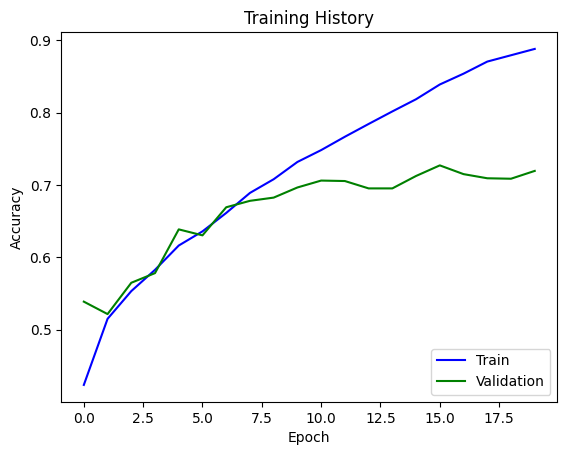

In [21]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [22]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.7


In [23]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.imdb import load_data, get_word_index       # Movie review data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                              # Turn the warnings off.
%matplotlib inline

In [24]:
n_words = 3000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words)
n_train_size = X_train.shape[0]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [25]:
# Check for the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (25000,)
Training data y shape: (25000,)
--------------------------------------------------
Test data X shape: (25000,)
Test data y shape: (25000,)
--------------------------------------------------


In [26]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

2

In [27]:
# Print out an observation (document) contained in X.
# It is encoded as integers (indices).
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [28]:
# Let's check for length of the first 100 documents.
# We notice that the length is not uniform.
print([len(a) for a in X_train[0:100]])

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171]


In [29]:
# Download the dictionary to translate the indices.
my_dict = get_word_index(path='imdb_word_index.json')

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [30]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [31]:
# Translate each document.
i_review = 10                                        # Document number that can be changed at will.
review = list(pd.Series(X_train[i_review]).apply(lambda x: my_dict_inv[x]))
print(' '.join(review))

the clear fact entertaining there life back br is and show of performance stars br actors film him many should movie reasons to and reading and are in of scenes and and of and out compared not boss yes to and show its disappointed fact raw to it justice by br of where clear fact many your way and with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it and who of shot you'll to love for and of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy and cry in chemistry but and all it maybe this is wing film job live of and relief and level names and and to be and serial and watch is men go this of wing american from and moving is and put this of jerry for places so work and watch and lot br that from sometimes and make department introduced to and from action at turns in low that in gay i'm of chemistry and i i simply alive it is time done inspector to wat

In [32]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [33]:
n_neurons = 50                    # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [34]:
# LSTM network model.
my_model = Sequential()
my_model.add(Embedding(n_words, n_input))           # n_words = vocabulary size, n_input = dimension of the embedding space.
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(1, activation='sigmoid'))    # Binary output!!!

In [35]:
# View the summary.
my_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
n_epochs = 5                      # Number of epochs.
batch_size = 50                    # Size of each batch.
learn_rate = 0.002                 # learning rate.

In [37]:
# Optimizer and compilation.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "binary_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [38]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7194 - loss: 0.5301 - val_accuracy: 0.8236 - val_loss: 0.3931
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8612 - loss: 0.3279 - val_accuracy: 0.8428 - val_loss: 0.3549
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8860 - loss: 0.2654 - val_accuracy: 0.8488 - val_loss: 0.3585
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9188 - loss: 0.2107 - val_accuracy: 0.8374 - val_loss: 0.3949
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9334 - loss: 0.1740 - val_accuracy: 0.8290 - val_loss: 0.4910


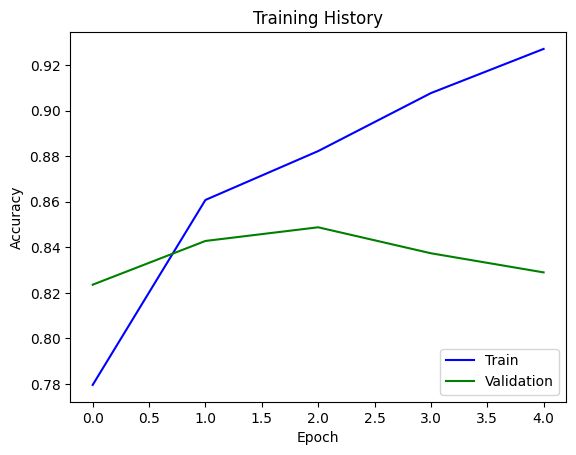

In [39]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [40]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.834


In [41]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.imdb import load_data, get_word_index       # Movie review data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                              # Turn the warnings off.
%matplotlib inline

In [42]:
n_words = 3000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words)
n_train_size = X_train.shape[0]

In [43]:
# Check for the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (25000,)
Training data y shape: (25000,)
--------------------------------------------------
Test data X shape: (25000,)
Test data y shape: (25000,)
--------------------------------------------------


In [44]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

2

In [45]:
# Print out an observation (document) contained in X.
# It is encoded as integers (indices).
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [46]:
# Let's check for length of the first 100 documents.
# We notice that the length is not uniform.
print([len(a) for a in X_train[0:100]])

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171]


In [47]:
# Download the dictionary to translate the indices.
my_dict = get_word_index(path='imdb_word_index.json')

In [48]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

In [49]:
# Translate each document.
i_review = 10                                        # Document number that can be changed at will.
review = list(pd.Series(X_train[i_review]).apply(lambda x: my_dict_inv[x]))
print(' '.join(review))

the clear fact entertaining there life back br is and show of performance stars br actors film him many should movie reasons to and reading and are in of scenes and and of and out compared not boss yes to and show its disappointed fact raw to it justice by br of where clear fact many your way and with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it and who of shot you'll to love for and of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy and cry in chemistry but and all it maybe this is wing film job live of and relief and level names and and to be and serial and watch is men go this of wing american from and moving is and put this of jerry for places so work and watch and lot br that from sometimes and make department introduced to and from action at turns in low that in gay i'm of chemistry and i i simply alive it is time done inspector to wat

In [50]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [51]:
drop_prob = 0.5                   # Dropout probability.
n_filters = 64                    # Number of filters (kernels).
k_size = 4                        # Kernel (filter) size.
stride_size = 1                   # Stride.
n_neurons = 50                    # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [52]:
# LSTM + CNN model..
my_model = Sequential()
my_model.add(Embedding(n_words,n_input))           # n_words = vocabulary size, n_input = dimension of the embedding space.
my_model.add(Dropout(rate=drop_prob))
my_model.add(Conv1D(filters=n_filters, kernel_size = k_size, strides=stride_size,padding='valid',activation='relu'))
my_model.add(MaxPool1D(pool_size = 2))
my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))
my_model.add(Dense(1, activation='sigmoid'))

In [53]:
# View the summary.
my_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
n_epochs = 5                      # Number of epochs.
batch_size = 50                    # Size of each batch.
learn_rate = 0.002                 # learning rate.

In [55]:
# Optimizer and compilation.
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "binary_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [56]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6914 - loss: 0.5457 - val_accuracy: 0.8412 - val_loss: 0.3589
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8744 - loss: 0.3056 - val_accuracy: 0.8284 - val_loss: 0.3821
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8888 - loss: 0.2724 - val_accuracy: 0.8252 - val_loss: 0.3845
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9093 - loss: 0.2292 - val_accuracy: 0.8478 - val_loss: 0.3672
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9265 - loss: 0.1971 - val_accuracy: 0.8400 - val_loss: 0.3870


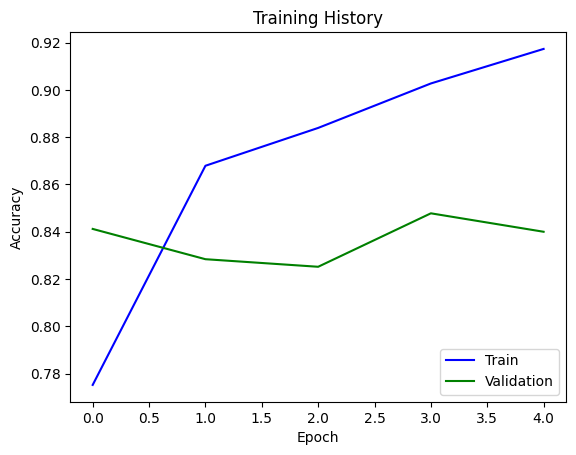

In [57]:
plt.plot(my_summary.history['accuracy'], c="b")
plt.plot(my_summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [58]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.842


In [59]:
%%capture
!pip install gensim
!pip install nltk

In [60]:
import re
import os
import nltk
import urllib
import bs4 as bs
import warnings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

In [62]:
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/118.0.0.0 Safari/537.36"
}


In [65]:
import requests as rq

url = "https://en.wikipedia.org/wiki/Machine_learning"
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/118.0.0.0 Safari/537.36"
}

res = rq.get(url, headers=headers)
print(res.status_code)


200


In [66]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')


In [ ]:
t = soup.find_all("p")
my_text = ''

for i in range(len(t)):
  my_text += t[i].text.strip() + '\n'

print(my_text)

In [70]:
my_text = my_text.lower()
my_text = re.sub(r'\[[0-9]*\]',' ', my_text)
my_text = re.sub(r'\W',' ', my_text)
my_text = re.sub(r'\d+',' ',my_text)
my_text = re.sub(r'\s+',' ',my_text)

In [74]:
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [75]:
my_sentences = nltk.sent_tokenize(my_text)
my_words_0=[]
for a_sentence in my_sentences:
    my_words_0 += nltk.word_tokenize(a_sentence)
my_words_0 = [a_word for a_word in my_words_0 if len(a_word)>2 ]
my_words_0 = [a_word for a_word in my_words_0 if a_word not in stopwords.words('english')]
my_words_0 = [my_words_0]    # Required by Word2Vec.
len(my_words_0[0])

5258

In [76]:
my_model = Word2Vec(my_words_0, vector_size = 100, min_count=1)
my_words = my_model.wv.key_to_index
len(my_words)

1964

In [77]:
# View the dense vector corresponding to 'machine'.
my_vector = my_model.wv['machine']
print("Length = " + str(my_vector.shape[0]))
print("-"*100)
print(my_vector)

Length = 100
----------------------------------------------------------------------------------------------------
[-1.28102396e-02  7.26072164e-03  4.47099749e-03  5.21528954e-03
  9.84899979e-03 -1.34755690e-02  3.12355603e-03  1.61188692e-02
 -7.40633765e-03 -9.72411502e-03 -2.36975984e-03 -1.40827140e-02
 -7.89842568e-03  9.74442437e-03  6.10190956e-03  3.96176847e-03
  7.68900011e-03  2.02291040e-03 -4.41724947e-03 -8.62316601e-03
  6.18506689e-03 -4.45044972e-03  1.01166274e-02 -1.49028823e-02
  5.79959759e-03  2.66688270e-03 -8.66138656e-03  1.69532513e-03
 -7.55965197e-03  7.07197236e-03  1.67883653e-02 -2.16963142e-03
  2.07667821e-03 -9.31802392e-03  1.26900419e-03  8.90520122e-03
  7.62699824e-03  1.25682831e-03  5.94698871e-03  7.40018557e-04
  6.94200676e-03 -1.19580971e-02 -1.18549541e-02  1.45520514e-03
  1.80267182e-03  6.13252586e-03  2.59880512e-03 -4.31457192e-05
  4.38101823e-03  4.45334613e-03  9.90202650e-03 -1.20166298e-02
 -1.88012514e-03  4.54208534e-03 -3.83031

In [78]:
my_model.wv.most_similar('learning')

[('class', 0.48813140392303467),
 ('artificial', 0.4567732810974121),
 ('classification', 0.4334268271923065),
 ('set', 0.43220195174217224),
 ('machine', 0.42736199498176575),
 ('algorithm', 0.4273504912853241),
 ('regression', 0.4111303687095642),
 ('data', 0.40256381034851074),
 ('various', 0.4001810848712921),
 ('system', 0.4000760614871979)]

In [79]:
my_model.wv.most_similar('artificial')

[('learning', 0.4567732512950897),
 ('support', 0.43997785449028015),
 ('various', 0.3812539875507355),
 ('research', 0.3528580367565155),
 ('include', 0.340202271938324),
 ('ethical', 0.3290305435657501),
 ('attempted', 0.3288049101829529),
 ('chooses', 0.32751932740211487),
 ('anomaly', 0.3256983160972595),
 ('likelihood', 0.3135204017162323)]

In [80]:
# Operation:
# global - cooling + warming = ???
my_model.wv.most_similar(positive=['machine','human'], negative= ['learning'])

[('reproduce', 0.33942070603370667),
 ('reshaping', 0.3359433114528656),
 ('three', 0.3154263198375702),
 ('also', 0.28154221177101135),
 ('neural', 0.27710479497909546),
 ('respect', 0.27153480052948),
 ('decision', 0.26702046394348145),
 ('owners', 0.26604509353637695),
 ('beliefs', 0.26437443494796753),
 ('store', 0.26291391253471375)]

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
# Load the file.
filename = "/content/GoogleNews-vectors-negative300.bin"
a_model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [83]:
# The most similar words to 'king' or 'kings'.
a_model.most_similar(['king','kings'])

[('princes', 0.6491755247116089),
 ('queen', 0.6316932439804077),
 ('monarch', 0.5960378646850586),
 ('queens', 0.5806739926338196),
 ('monarchs', 0.5739458799362183),
 ('prince', 0.560089647769928),
 ('ruler', 0.5597525835037231),
 ('sultan', 0.5568172931671143),
 ('kings_princes', 0.552049994468689),
 ('emperors', 0.5400723814964294)]

In [84]:
# Operation: queen(queens) - woman(women) + man(men) = ???
a_model.most_similar(positive=['queen','queens','man','men'], negative= ['woman','women'])

[('kings', 0.6578558683395386),
 ('king', 0.6328856945037842),
 ('princes', 0.5353103876113892),
 ('Senti_pocket', 0.512298047542572),
 ('princesses', 0.49174803495407104),
 ('jesters', 0.48247599601745605),
 ('queens_princes', 0.4717157781124115),
 ('princess', 0.46906545758247375),
 ('monarchs', 0.46611741185188293),
 ('prince', 0.4655950367450714)]

Lunes vamos a ver https://github.com/davidlealo/sic_ai_2025_jun/blob/main/04pln/clase_29.ipynb

Esto también https://github.com/davidlealo/sic_ai_2025_jun/blob/main/04pln/clase_30.ipynb